# TP2 Nelson Roux de Bézieux 

SD-TSIA 204

In [85]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SequentialFeatureSelector

import scipy as sp
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Question 1 

Downloeading data 

In [11]:
raw_data = pd.read_csv("View.php")
raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [101]:
print("Dimensions of this data_frame are : ", raw_data.shape)

Dimensions of this data_frame are :  (215, 101)


There are 100 features and on result variable

Let's look a the statistics 

In [13]:
raw_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


Séparation des variables en variables d'observation et en variables explicatives

In [14]:
#Exploratory variables 
X = raw_data.iloc[:,:100]
#Observation variables 
Y = raw_data.iloc[:,100]


X = X.to_numpy().copy()
Y = Y.to_numpy().copy()

FAIRE DES PLOTS 

Les variables ne sont pas centrées, elles ne sont pas normalisées ni standardisées

Séparation en données **d'entrainement**, et données de **test** 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

Data normalization is a common step in preparing data for training machine learning models. It puts the data on a common scale by reducing the mean to zero and normalizing the standard deviation to 1. **This makes the data more easily comparable and prevents data with a very different range of values from dominating the training.**


**StandardScaler().fit_transform(X_train)** calculates the mean and standard deviation of each feature of X_train (each column of the X_train matrix) and then normalizes the values using these parameters. The result is a normalized matrix of the same dimension as X_train.

**StandardScaler().fit_transform(np.reshape(y_train,(-1,1)))** does the same thing as the previous line, but for y_train. However, before normalizing, it uses np.reshape(y_train,(-1,1)) to ensure that y_train is a 2D array, with a single column and a number of rows equal to the number of examples in X_train.

**StandardScaler().fit_transform(X_test)** normalizes X_test using the means and standard deviations calculated from X_train.

**StandardScaler().fit_transform(np.reshape(y_test,(-1,1)))** normalizes y_test using the means and standard deviations calculated from y_train.`

In [16]:
X_train = StandardScaler().fit_transform(X_train)
y_train = StandardScaler().fit_transform(np.reshape(y_train,(-1,1)))
X_test = StandardScaler().fit_transform(X_test)
y_test = StandardScaler().fit_transform(np.reshape(y_test,(-1,1)))

Implémntation de fonctions utilisées tout au court de TP 

In [17]:
def MSE(Y,Z):
    """
    Input : 
    Y : np.array 
    Z : np.array 
    
    Output : 
    MSE
    """
    return np.sum((Z-Y)**2)/len(Y)

def R2(Y_observed, Y_predicted):
    """
    Compute the determination coefficient of an OLS model
    
    Input:
    Y_observed: the observed target data
    Y_predicted: the predicted target data
    
    Output:
    Determination coefficient (R^2)
    """
    Y_observed = Y_observed.flatten()
    Y_predicted = Y_predicted.flatten()
    return 1 - np.linalg.norm(Y_predicted - Y_observed)**2 / np.linalg.norm(Y_observed - np.mean(Y_observed))**2

Linear regression model using the LinearRegression function of the sklearn.linear_model library with the option **fit_intercept = False**, which means that the intercept is assumed to be **null**.
Indeed, as the dataset has been centered, it is useless to put an intercept. 

In [33]:
reg = LinearRegression(fit_intercept = False).fit(X_train, y_train)
# Y_test using the model applied to X_test

y_hat = reg.predict(X_test)

print("R² of the test data:", reg.score(X_test, y_test))
print("MSE of the test data is :", MSE(y_test, y_hat))

data = [[reg.score(X_test, y_test)]]
data_R2 = pd.DataFrame(data,['Sklearn OLS'], ['r2'])
data_R2

R² of the test data: 0.8665797675472116
MSE of the test data is : 0.13342023245278845


,r2
Sklearn OLS,0.86658


# Question 2 

This code implements a variable selection method called "forward selection", which consists in adding one variable at a time to the model using a statistical test method to evaluate the performance of each variable.

In [19]:
def forward_selection_variable(X,Y):
    l = np.copy(Y) #in order not to modify Y
    variables = [] #new list for the selected variables 
    q = X.shape[0] #useful in the computations 
    pvalues = [] #list of pvalues
    variablesel = []
    for i in range(X.shape[1]):
        tetas = [] #List of thetas in competition for this iteration
        T = [] #list in which we will store the values of the statistical test for all the features
        for i in range (X.shape[1]): # going through all variables to search for largest T/smallest p-value
            if i not in variables: #we look at the variables that we do not have selected yet
                reg = LinearRegression(fit_intercept=True).fit(X[:, i].reshape(-1, 1), l)#we fit regarding only one variable 
                coef = reg.coef_
                intercept = reg.intercept_
                tetas.append(np.array([intercept, coef[0]])) #to have a sequence of arrays 
                #Computing Gram Matrix 
                G = np.matmul(np.c_[np.ones(q),X[:,i]].T,np.c_[np.ones(q),X[:,i]])/q
                #Computing noise
                noise = ((np.linalg.norm(l - np.matmul(np.c_[np.ones(q),X[:, i]],np.array([intercept, coef[0]])), ord = 2))**2)/(q-2)
                #Computing "s"
                s = np.dot(np.dot(np.array([0, 1]).T,np.linalg.inv(G)), np.array([0, 1]))
                t = ((np.sqrt(X.shape[0]))*(np.linalg.norm(np.array([intercept, coef[0]]))))/(noise*(np.sqrt(s)))
                T.append(float(t)) #adding it to the T list
            else : 
                T.append(0)
                tetas.append(np.array([0,0]))
        sel = T.index(max(T)) #selection of the largest value of T found 
        variables.append(sel) #addition of the largest value of T found 
        l -= np.matmul(np.c_[np.ones(q), X[:, sel]], tetas[sel]) #update of Y 
        #Computing the P_values 
        pvalue = 2*(1-sp.stats.norm.cdf(T[sel]))
        if pvalue < 0.05 :
            variablesel.append(sel)
    return variablesel

        
    

Variables that are **kept** : 

In [20]:
variablesel = forward_selection_variable(X_train,y_train)
print(variablesel)

[40, 7, 39, 6, 41, 8, 38, 5, 42, 9, 37, 4, 36, 10, 97, 3, 43, 11, 35, 2, 96, 12, 98]


# Question 3

In [34]:
X_train_sel = X_train[:,variablesel]
X_test_sel = X_test[:,variablesel]
reg_sel = LinearRegression().fit(X_train_sel,y_train)
print("R² of the test data:", (reg_sel.score(X_test_sel, y_test)))

new_line = pd.DataFrame([[reg_sel.score(X_test_sel, y_test)]],['Sklearn OLS with forward Selection'], ['r2'])
data_R2 = pd.concat([data_R2, new_line])
data_R2

R² of the test data: 0.8685343272669486


,r2
Sklearn OLS,0.866580
Sklearn OLS with forward Selection,0.868534


This is a better result ! 

# Question 4 

In [35]:
def genereX(X,L):
    '''
    Generats a new matrix of features based on a list of indices L and an input feature matrix X
    Input : Matrix X, List L 
    
    Output : Matrix A
    '''
    n=np.shape(X)[0]
    p=len(L)
    A=np.ones((p,n))
    for i in range(len(L)):
        A[:][i]=np.reshape(X[:,L[i]],(1,-1))
    return A.T

def transform(H):
    '''
    This function is used in combination with the SequentialFeatureSelector class in the scikit-learn 
    library to extract the indices of the selected features in a feature selection process. 
    The SequentialFeatureSelector object returns a boolean array indicating which features are selected, 
    and the transform function is used to extract the indices of the selected features from this array. 
    The resulting list of indices can then be used to create a new feature matrix consisting only of 
    the selected features, which can be used to train a new model or make predictions.
    Input : Boolean array H 
    
    Output : Boolean List res
    
    
    '''
    res=[]
    for i in range(len(H)):
        if H[i]:
            res.append(i)
    return res 


sfs = SequentialFeatureSelector(LinearRegression(fit_intercept=False), n_features_to_select=22)
sfs.fit(X_train,y_train)
H=sfs.get_support()
reg=LinearRegression(fit_intercept=False).fit(genereX(X_train,transform(H)),y_train)

reg.score(genereX(X_test,transform(H)),y_test)
res=reg.score(genereX(X_test,transform(H)),y_test)
new_line = pd.DataFrame([[res]],['fwd_selection_seq'], ['r2'])
data_R2 = pd.concat([data_R2, new_line])
data_R2

,r2
Sklearn OLS,0.866580
Sklearn OLS with forward Selection,0.868534
fwd_selection_seq,0.851014


# Question 5 

In [37]:
def thetaridge(x):
    L = (np.linalg.inv((np.transpose(X_train)@X_train) + X_train.shape[0]*x*np.eye(X_train.shape[1])))@np.transpose(X_train)@y_train
    return L 

Text(0.5, 0, '$\\alpha$')

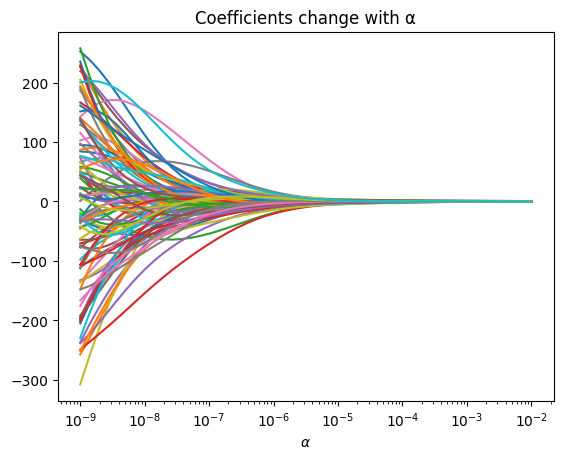

In [38]:
#Plotting the coefficients change with alpha 

alphalist = [l for l in np.logspace(-9,-2, 50)]
thetas = np.array([thetaridge(l) for l in alphalist])
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
L = []
l = []
for j in range(100):
    l = []
    for i in alphalist:
        l.append(thetaridge(i)[j][0])
    plt.plot(alphalist,l)
plt.title("Coefficients change with α")
plt.xlabel(r"$\alpha$")


Tout les coefficients **convergent vers 0**

In [39]:
MSE_train = []
MSE_test = []
for i in alphalist:
    MSE_train.append(MSE(X_train@thetaridge(i), y_train))
    MSE_test.append(MSE(X_test@thetaridge(i),y_test))
print("R2 avec Theta Ridge : ", R2(X_test@thetaridge(np.argmin(MSE_train)),y_test))
new_line = pd.DataFrame([R2(X_test@thetaridge(np.argmin(MSE_train)),y_test)],['Handmade Ridge '], ['r2'])
data_R2 = pd.concat([data_R2, new_line])
data_R2

R2 avec Theta Ridge :  0.9149509128974146


,r2
Sklearn OLS,0.866580
Sklearn OLS with forward Selection,0.868534
fwd_selection_seq,0.851014
Handmade Ridge,0.914951


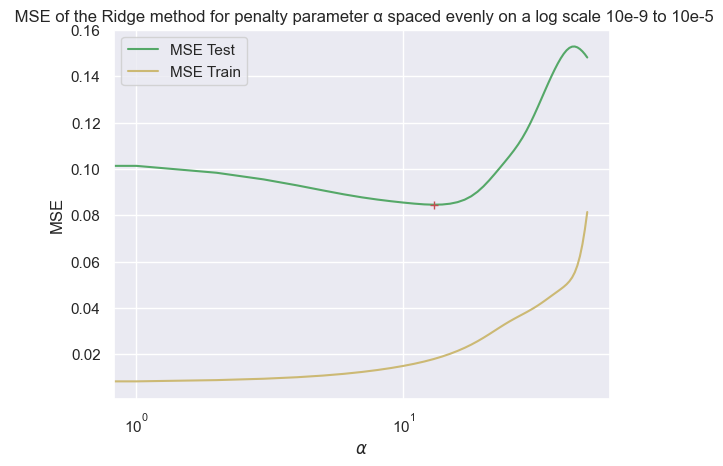

In [41]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
plt.plot(MSE_test, label = "MSE Test", color = 'g')
plt.plot(MSE_train, label = "MSE Train", color = 'y')
plt.plot(np.argmin(MSE_train), np.min(MSE_train), 'r+')
plt.plot(np.argmin(MSE_test), np.min(MSE_test),'r+')
plt.title(" MSE of the Ridge method for penalty parameter α spaced evenly on a log scale 10e-9 to 10e-5")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.legend()

# Question 6

In [40]:
def count0(A): 
    '''
    Counts the number of coefficient equal to 0 
    Input : Matrix A 
    Output : Integer s 
    '''
    s = 0 
    for i in range(A.shape[0]):
        if np.abs(A[i]) < 0.00001:
                s += 1
    return s        

In [41]:
reg = Lasso(alpha = 10**(-5), max_iter = 10**6, tol = 0.01)
reg.fit(X_train,y_train)

print("Determination coefficient: ", reg.score(X_test, y_test))
print("MSE: ", MSE(reg.predict(X_test), y_test))

alphas = np.logspace(-5,-2,50)
L = []
MSE_lasso =[]
R2_Lasso = []
for i in alphas:
    reg = Lasso(alpha = i  , max_iter = 10**6, tol = 0.01).fit(X_train,y_train)
    L.append(100 - count0(reg.coef_))
    MSE_lasso.append(MSE(reg.predict(X_test), y_test))
    R2_Lasso.append(reg.score(X_test, y_test))
    


Determination coefficient:  0.8915854421001144
MSE:  135.73928848921219


In [42]:
regmin_lasso = Lasso(alpha = 10**(-5), max_iter = 10**6, tol = 0.001).fit(X_train,y_train)
print(regmin_lasso.score(X_test, y_test))
new_line = pd.DataFrame(regmin_lasso.score(X_test, y_test),['Skicit lasso'], ['r2'])
data_R2 = pd.concat([data_R2, new_line])
data_R2


0.8955628624795277


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+00, tolerance: 1.610e-01
  model = cd_fast.enet_coordinate_descent(


,r2
Sklearn OLS,0.866580
Sklearn OLS with forward Selection,0.868534
fwd_selection_seq,0.851014
Handmade Ridge,0.914951
Skicit lasso,0.895563


Text(0, 0.5, 'Numbers of zeros')

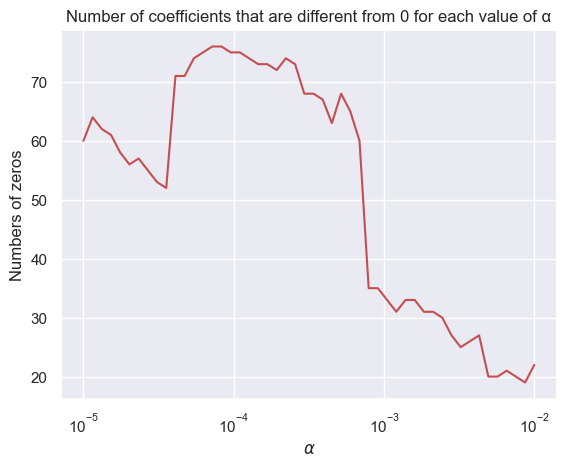

In [45]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
plt.plot(alphas,L, label = "Trainset number of 0", color = 'r')
plt.title("Number of coefficients that are different from 0 for each value of α")
plt.xlabel(r"$\alpha$")
plt.ylabel("Numbers of zeros")

Text(0, 0.5, 'MSE')

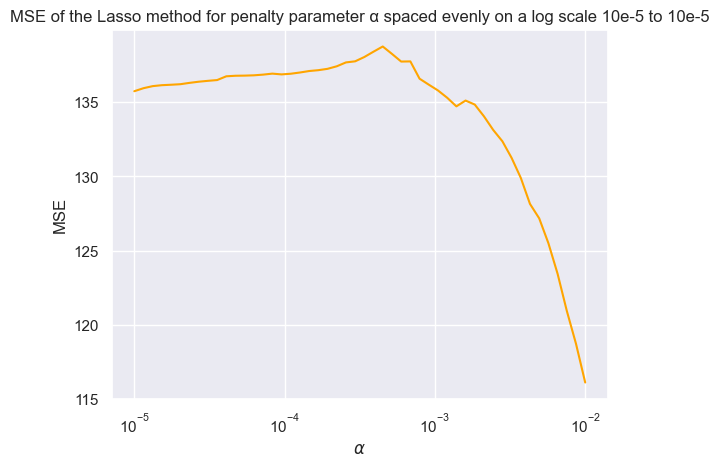

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
plt.plot(alphas,MSE_lasso, label = "Trainset number of 0", color = 'orange')
plt.title("MSE of the Lasso method for penalty parameter α spaced evenly on a log scale 10e-5 to 10e-5")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")

Text(0, 0.5, 'r2')

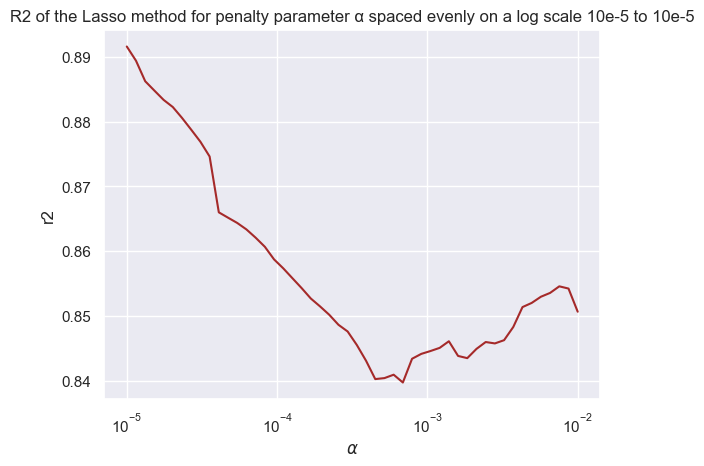

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale("log")
plt.plot(alphas,R2_Lasso, label = "Trainset number of 0", color = 'brown')
plt.title("R2 of the Lasso method for penalty parameter α spaced evenly on a log scale 10e-5 to 10e-5")
plt.xlabel(r"$\alpha$")
plt.ylabel("r2")

# Question 8

Bootstrap is a statistical method that involves **resampling from the original data to estimate the sampling distribution of an estimator (such as the mean or variance) and its associated uncertainty**. The basic idea behind the bootstrap method is to **simulate multiple datasets by randomly sampling from the original dataset with replacement**, and then **compute the estimator of interest** on each of the simulated datasets. The resulting distribution of estimates can be used to compute confidence intervals and test hypotheses about the true value of the estimator.

In the context of linear regression, the bootstrap method can be used to estimate the standard errors of **the regression coefficients** and to compute confidence intervals for the coefficients. The basic procedure involves repeatedly sampling from the original data with replacement to create a large number of bootstrap samples, fitting a regression model to each bootstrap sample, and then computing the regression coefficients. The resulting distribution of coefficients can be used to estimate the standard errors and construct confidence intervals.

The prediction_intervals(X, Y, reg) function is defined within boostrap() and computes the prediction intervals for a given linear regression model reg fit to the data X and Y. The code also defines and fits a linear regression model reg to the original data, and then calls the boostrap() function with the specified arguments to generate and plot prediction intervals for the bootstrap models.

Text(0.5, 1.0, 'Bootstrap')

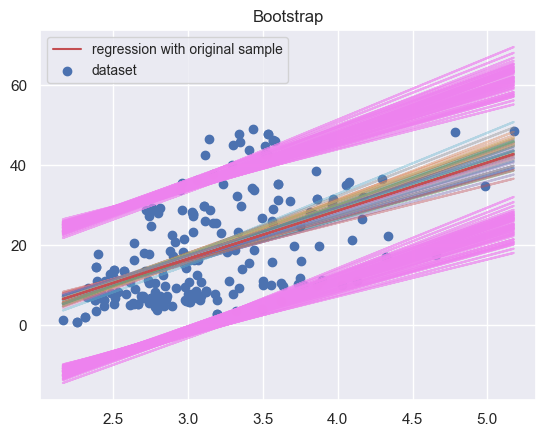

In [60]:
X_base=np.array(raw_data.iloc[:,40])
X=np.reshape(np.array(raw_data.iloc[:,40]),(-1,1))
Y=np.array(raw_data.iloc[:,100])
reg= LinearRegression(fit_intercept=True).fit(X,Y)
def boostrap(B,X,Y):
    """
    A function to perform bootstrap resampling on the data and plot the prediction intervals.

    Parameters:
    B (int): the number of bootstrap samples to generate
    X (array-like): the predictor variable
    Y (array-like): the target variable
    """
    
    n=len(X)
    for i in range(B):
        X_boost=[]
        Y_boost=[]
        # Sampling with replacement from the data
        for i in range(n): 
            a=np.random.randint(n)
            X_boost.append(X[a])
            Y_boost.append(Y[a])
        # Fitting a linear regression model to the bootstrap sample
        reg= LinearRegression(fit_intercept=True).fit(X_boost,Y_boost)
        # Generating prediction intervals
        a,b=prediction_intervals(X,Y,reg)
        # Plotting the regression line and prediction intervals for each bootstrap sample
        plt.plot(X,reg.predict(X),alpha=.4)
        plt.plot(X,a,color="violet",alpha=0.7)
        plt.plot(X,b,color="violet",alpha=0.7)

def prediction_intervals(X,Y,reg):
    n=len(X)
    noise=np.sqrt(1/(n-2))*np.linalg.norm(Y-reg.predict(X))
    confidence_bas=[]
    confidence_haut=[]
    for i in range(n):
        A=noise*np.sqrt(1+(1/n)+(X[i][0]-np.mean(X))/(np.linalg.norm(X-np.mean(X)))**2)
        confidence_bas.append(-A*sp.stats.t.ppf(0.95,n-2)+reg.predict(X)[i])
        confidence_haut.append(A*sp.stats.t.ppf(0.95,n-2)+reg.predict(X)[i])
    return confidence_bas,confidence_haut

a,b=prediction_intervals(X,Y,reg)
plt.plot(X,reg.predict(X),alpha=.4)
plt.plot(X,a,color="violet",alpha=0.7)
plt.plot(X,b,color="violet",alpha=0.7)
boostrap(50,X,Y)
plt.plot(X,reg.predict(X),"r",label="regression with original sample")
plt.scatter(X,Y,label="dataset")
plt.legend(loc='best',fontsize="small")  
plt.title("Bootstrap")


In [ ]:
print(type(X_train))

# Question 9

Singular value decomposition (SVD) is a common method used in principal component analysis (PCA). PCA is a method of data analysis that involves **reducing the dimensionality of a large set of variables to a smaller set that still contains most of the information in the original set**. SVD is used in PCA to **identify the principal components, which are linear combinations of the original variables that capture the most variation in the data**.

In PCA, the SVD is used to decompose the data matrix into three matrices: U, D, and V. U and V are orthogonal matrices, and D is a diagonal matrix containing the singular values of the original data matrix. The singular values indicate the amount of variation captured by each principal component. The principal components are then calculated by multiplying the original data matrix by the orthogonal matrix V and selecting the first few columns of the resulting matrix.

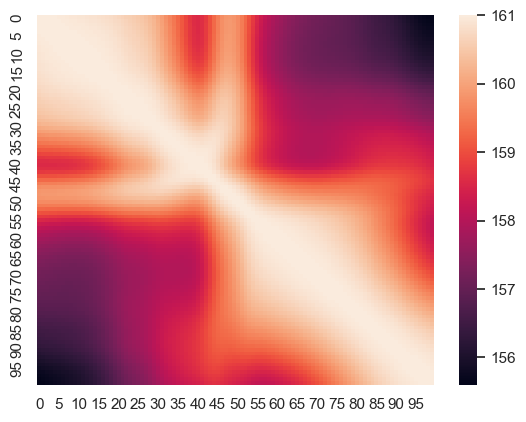

In [73]:
#SVD Decomposition 
cov_mat = X_train.T @ X_train
U,s,V = np.linalg.svd(cov_mat)
# Heatmap of the covariance matrix
sns.heatmap(cov_mat)
sns.set_style("whitegrid", {'axes.grid': False}) # workaround for deprecation warning
sns.set() # return to default seaborn parameter


In [74]:
X_train@U

array([[-2.13897953e+01, -2.52130252e+00, -1.03093078e+00, ...,
         7.69685797e-07,  1.51800019e-06, -4.13504865e-07],
       [ 1.12329855e+01, -7.61983982e-01, -2.28488758e-01, ...,
         3.42636183e-06, -2.55899512e-06, -1.72325383e-06],
       [ 1.32896030e+01, -1.86799772e-01,  1.58335475e-01, ...,
         1.35649004e-06, -6.66233184e-06, -1.95020293e-06],
       ...,
       [-1.50755805e+01,  7.02675627e-01,  5.60332197e-02, ...,
         1.13457055e-06,  7.96676358e-07, -1.55006353e-06],
       [ 1.41538447e+01,  8.70016072e-01, -9.69131663e-02, ...,
         1.38606189e-06,  1.64329460e-06, -1.67924435e-06],
       [-1.29184694e+00, -6.19653056e-01,  1.29059400e+00, ...,
        -6.54849198e-06,  4.39303737e-07,  3.00995424e-06]])

Text(0, 0.5, 'Proportion')

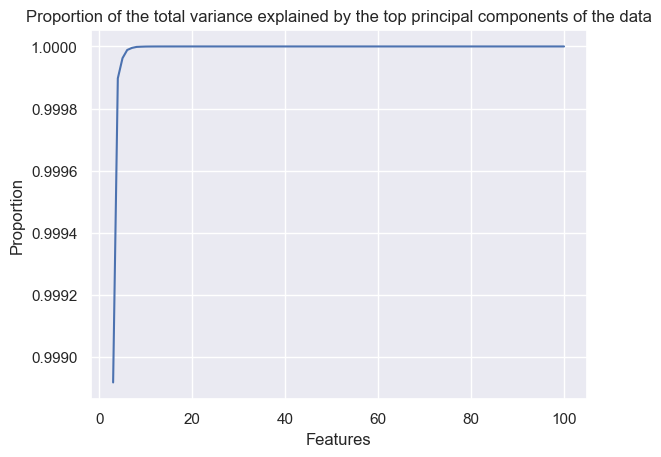

In [89]:
p = 100
res=[]
absi=np.linspace(3,p,p-3)
p=np.shape(X_train)[1]
for i in range(3,p):
    temp=0
    for k in range(i):
        temp+=s[k]
    res.append(temp/np.sum(s))
plt.plot(absi,res)
plt.title("Proportion of the total variance explained by the top principal components of the data")
plt.xlabel("Features")
plt.ylabel("Proportion")


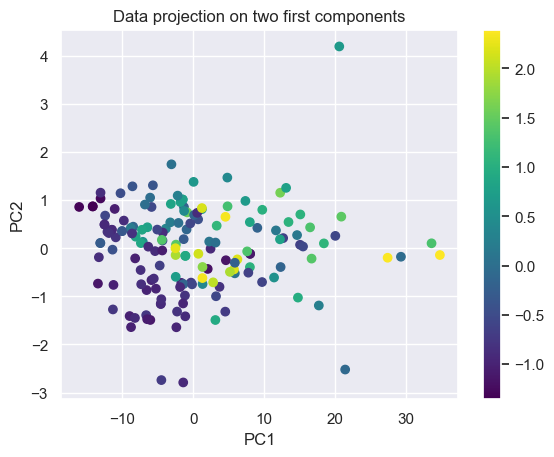

In [100]:
# PCA on data from the two principle features
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_train)

cmap = plt.cm.get_cmap('viridis')
# Plot data
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_train, cmap=cmap)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data projection on two first components')
plt.show()

We don't notive sperate clusters. 

In [98]:
for i in range(2,p):
    temp=0 # temp is used to keep track of the best score found so far
    #and indice is used to keep track of the index that corresponds to the best score
    indice=-1
    #This line extracts the first i columns of the matrix X_proj and stores them in the variable X_t. 
    #These columns represent the projection of the data onto the first i principal components.
    X_t=X_proj[:,:i]
    #This line creates a linear regression model with fit_intercept=False, which means that the model will not fit an intercept term. 
    #The model is then fitted to the training data X_t and y_train.
    reg= LinearRegression(fit_intercept=False).fit(X_t,y_train)
    X_test_proj=np.array(X_test)@U
    if reg.score(X_test_proj[:,:i],y_test)>temp:
        temp=reg.score(X_test_proj[:,:i],y_test)
        indice=i
temp,i

(0.8763843961281764, 99)

In [99]:
new_line = pd.DataFrame(temp,['PCA'], ['r2'])
data_R2 = pd.concat([data_R2, new_line])
data_R2


,r2
Sklearn OLS,0.866580
Sklearn OLS with forward Selection,0.868534
fwd_selection_seq,0.851014
Handmade Ridge,0.914951
Skicit lasso,0.895563
PCA,0.876384


# Question 10 

The best result we obtained in this pratcial work is with the handmade ridge. The wors result is with the sequentuial forward selection. This result is quite strange. 
However, given the fact that **their could be some mistakes in the above could, we shall not make a generalized ranking of the differents techniques base on this work even it can still reveal some intersting conclusions on the use of these different techniques**. 


Here a some remarks of things that I learned during this practical work : 

- OLS is quite good, and doesn't require a lot of work 
- OLS with forwazrd selection was very difficult to implement, and didn't improve much the score 
- Plotting the data is important to see how results evolve given the different techniques

Regarding the different techniques : 

- PCA with OLS is usually should be used when you want to reduce the overall dimension of the features space
- Ridge technique is very interesting because it allows to manipulate as we want the biais-varaince decomposition. In deed, it allow us to controll the size of the regressor and handle overfitting as we want to. This is not possible classic OLS techniques which could thus become unusable for some datasets. 

I apologize for not having dealed with question 7, due to a lack of time. 